In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
data = pd.read_csv('tvmarketing.csv')

In [62]:
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [63]:
tv = data['TV']
sales = data['Sales']

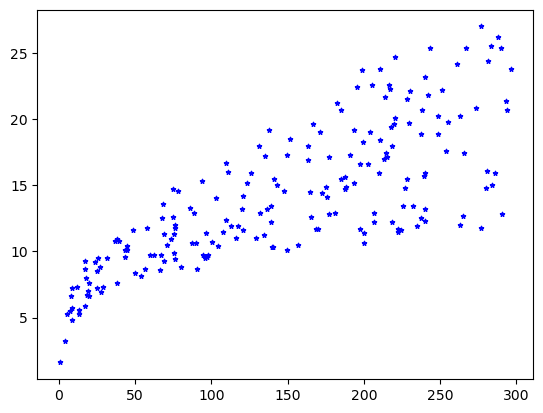

In [64]:
plt.scatter(tv,sales, c='b', marker='*', s=10)
plt.show()

In [65]:
X = tv.to_numpy().reshape(-1, 1)
Y = sales.to_numpy().reshape(-1, 1)
print(X.shape)
print(Y.shape)

(200, 1)
(200, 1)


In [66]:
from sklearn import model_selection

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.9) 

# This will split data into two parts, 80% for training the model and the rest 20% for testing the model
# X_train and X_test will have house_ages
# Y_train and Y_test will have house_values

In [67]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [68]:
reg.fit(X_train, Y_train)

LinearRegression()

In [69]:
reg.coef_

array([[0.04065469]])

In [70]:
reg.intercept_

array([7.98275438])

In [71]:
w = reg.coef_[0]
b = reg.intercept_

In [72]:
def predict(X, w, b):
    Y = w*X + b
    return Y

In [73]:
y_pred = predict(X_test, w, b)

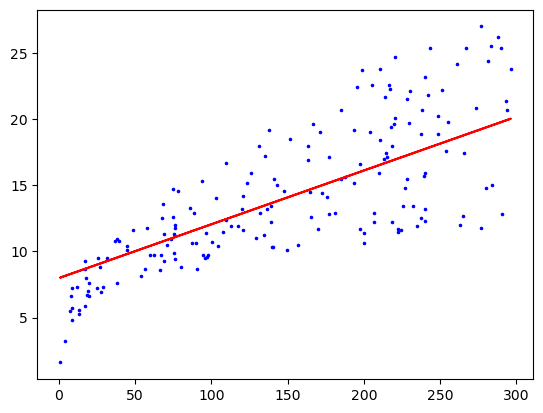

In [74]:
plt.plot(X_test, y_pred, c='r')
plt.scatter(X_test, Y_test, c='b', marker='.', s=10)
plt.show()

In [75]:
# R^2 Score
def score(Y_test, Y_pred):
    num = ((Y_test-y_pred)**2).sum()
    den = ((Y_test-Y_test.mean())**2).sum()
    error = 1 - (num/den)
    return error

In [76]:
error = score(Y_test, y_pred)
print(error)

0.5933192780967577


In [77]:
def cost(X_train, Y_train, w, b):
    cost = ((Y_train - (w*X_train)+b)**2).mean()
    return cost

In [78]:
costf = cost(X_train, Y_train, w, b)
costf

260.72041021842296